#Importing libraries

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#load data set

In [59]:
df = pd.read_csv('/content/Zomato-data-.csv')
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


#Data clening

In [60]:
df.head(5)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


there are 7 columns and 148 rows available

In [62]:
df.describe()

,votes,approx_cost(for two people)
count,148.000000,148.000000
mean,264.810811,418.243243
std,653.676951,223.085098
min,0.000000,100.000000
25%,6.750000,200.000000
50%,43.500000,400.000000
75%,221.750000,600.000000
max,4884.000000,950.000000


In [63]:
df.duplicated().sum()

np.int64(0)

In [64]:
df.isnull().sum()

,0
name,0
online_order,0
book_table,0
rate,0
votes,0
approx_cost(for two people),0
listed_in(type),0


There no duplicates and null values

In [65]:
def handleRate(value):
  value = str(value).split('/')
  value = value[0]
  return float(value)
df['rate'] = df['rate'].apply(handleRate)
df.head(5)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


rate column convert into float and removed denomintoer.

#Visualazation
##Univariate analysis

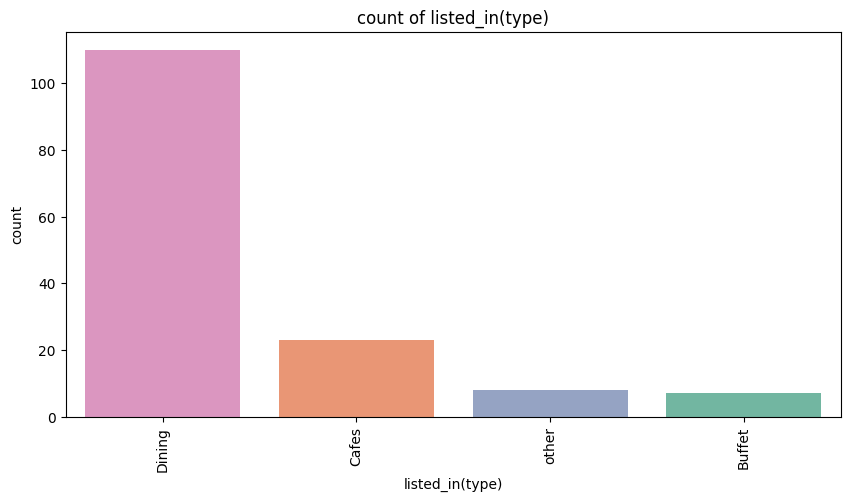

In [66]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['listed_in(type)'],data=df,order=df['listed_in(type)'].value_counts().index,palette='Set2',hue='listed_in(type)')
plt.xticks(rotation=90)
plt.xlabel('listed_in(type)')
plt.ylabel('count')
plt.title('count of listed_in(type)')
plt.savefig('countplot.png')
plt.show()

The 'Dining' category indeed has the highest count, which could indicate a preference for full-service restaurants and prefered low online order as other  categories are more prefered online orders.



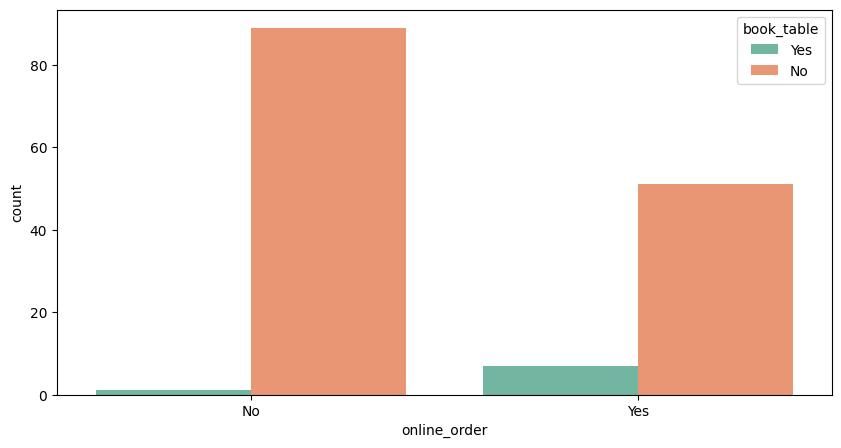

In [67]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['online_order'],data=df,order=df['online_order'].value_counts().index,palette='Set2',hue='book_table')
plt.xlabel('online_order')
plt.ylabel('count')
plt.savefig('countplot2.png')
plt.show()

customers are more prefer restaurant.larger number of customers prefer not to order online and also don't book tables frequently.

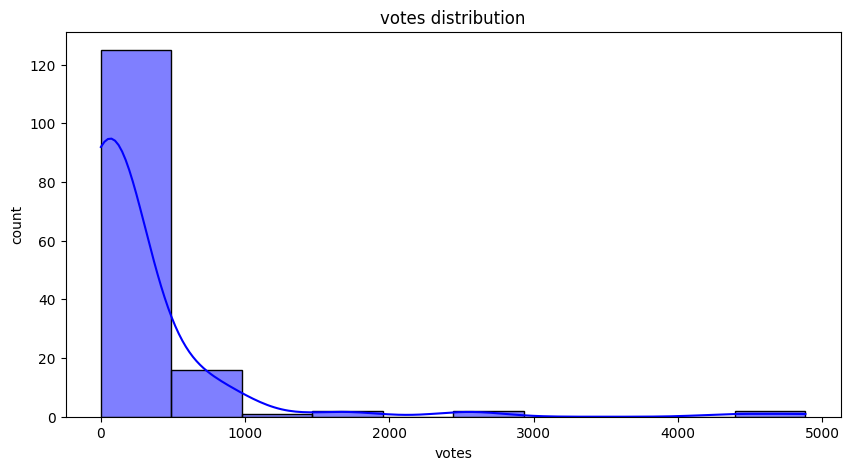

In [68]:
plt.figure(figsize=(10,5))
sns.histplot(df['votes'],bins=10,color='blue',kde=True)
plt.title('votes distribution')
plt.xlabel('votes')
plt.ylabel('count')
plt.savefig('histplot.png')
plt.show()

 A large number of data points are indeed concentrated below 1000 votes, which suggests that most restaurants in this dataset have a relatively moderate number of votes. It's a reasonable interpretation to associate this with a 'normal service rate', as extremely high vote counts might indicate exceptional popularity or a longer presence.



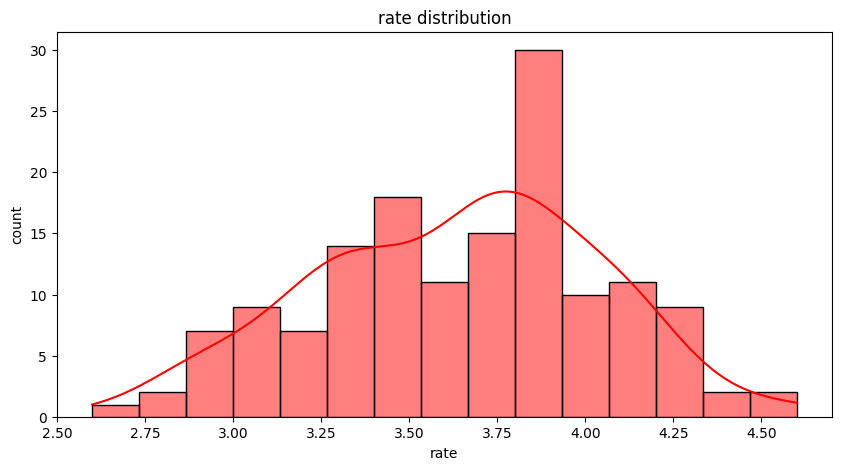

In [69]:
plt.figure(figsize=(10,5))
sns.histplot(df['rate'],bins=15,color='red',kde=True)
plt.title('rate distribution')
plt.xlabel('rate')
plt.ylabel('count')
plt.savefig('histplot2.png')
plt.show()

The histogram does show a concentration of ratings between 3.5 and 3.9. This suggests a generally positive sentiment among customers who provided ratings.

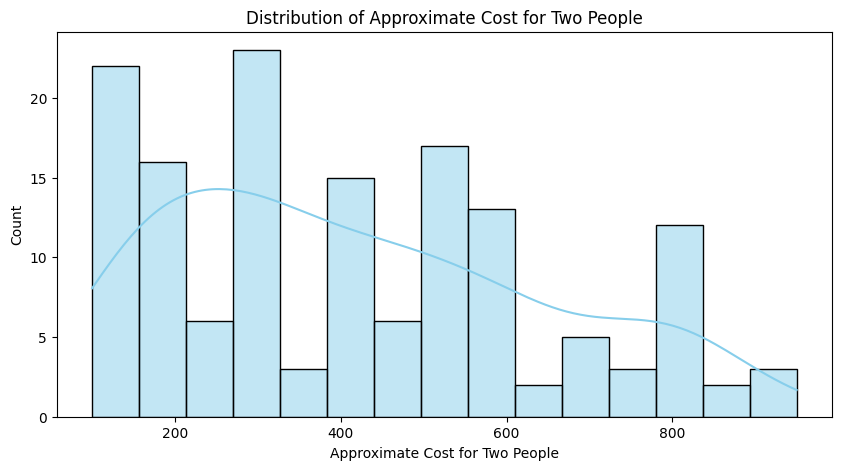

In [70]:
plt.figure(figsize=(10,5))
sns.histplot(df['approx_cost(for two people)'], bins=15, kde=True, color='skyblue')
plt.xlabel('Approximate Cost for Two People')
plt.ylabel('Count')
plt.title('Distribution of Approximate Cost for Two People')
plt.savefig('histplot3.png')
plt.show()

Histogram of 'Approximate Cost for Two People'. Here are some observations:

Concentration of Costs: The histogram shows that a large number of restaurants have an approximate cost for two people in the lower to mid-range. There are noticeable peaks around 200-300 and again around 400-600.
Variability: While there are peaks, the costs are distributed across a fairly wide range, from the minimum of 100 up to the maximum of 950, as seen in the .describe() output earlier.
Fewer High-Cost Restaurants: There are fewer restaurants in the higher cost brackets (e.g., above 800).

##Bivariaty analysis


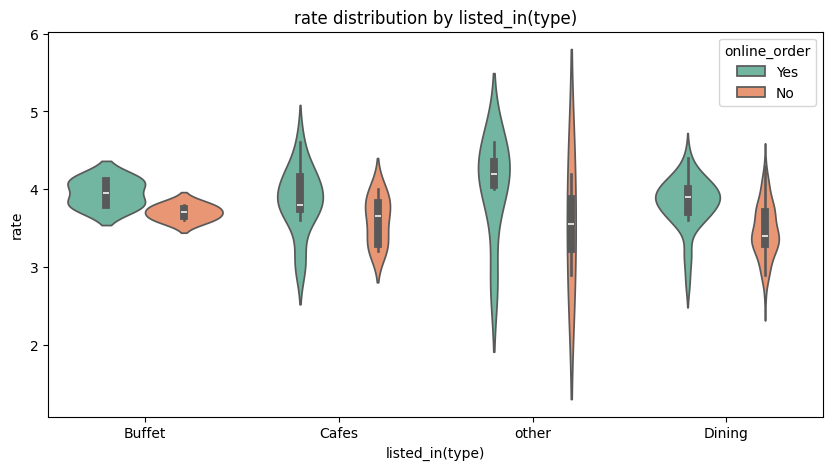

In [71]:
plt.figure(figsize=(10,5))
sns.violinplot(x=df['listed_in(type)'],y=df['rate'],data=df,hue='online_order',palette='Set2')
plt.xlabel('listed_in(type)')
plt.ylabel('rate')
plt.title('rate distribution by listed_in(type)')
plt.savefig('violinplot.png')
plt.show()

customers are more positive rates by online ordering services.most listed in(type) categories, restaurants with online ordering tend to have slightly higher average ratings compared to those without online ordering.

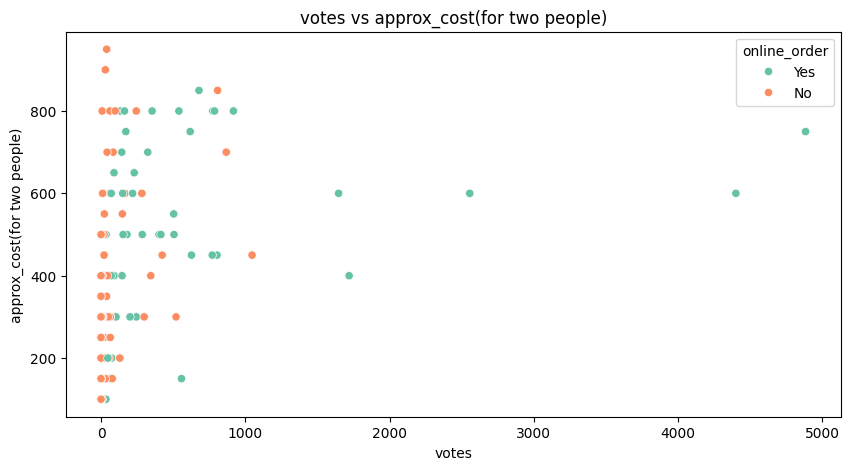

In [72]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df['votes'],y=df['approx_cost(for two people)'],data=df,hue='online_order',palette='Set2')
plt.xlabel('votes')
plt.ylabel('approx_cost(for two people)')
plt.title('votes vs approx_cost(for two people)')
plt.savefig('scatterplot.png')
plt.show()

 There's no strong link between votes and cost. Many restaurants have few votes but vary in price. Online ordering restaurants are spread across different vote and cost levels."

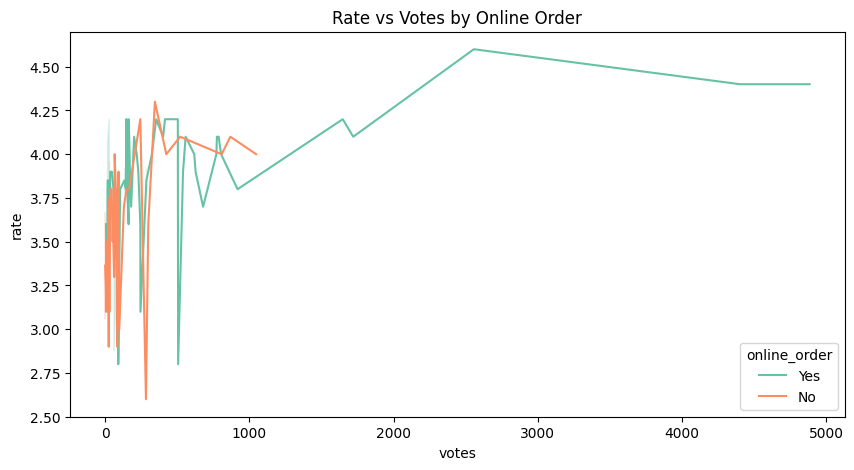

In [73]:
plt.figure(figsize=(10,5))
sns.lineplot(x=df['votes'],y=df['rate'],data=df,hue='online_order',errorbar='sd',palette='Set2')
plt.xlabel('votes')
plt.ylabel('rate')
plt.title('Rate vs Votes by Online Order')
plt.savefig('lineplot.png')
plt.show()

 line plot suggests that as restaurants get more votes, their average rating tends to increase, and restaurants offering online ordering seem to have slightly higher average ratings, especially at higher vote counts.

#Multi-variate analysis.

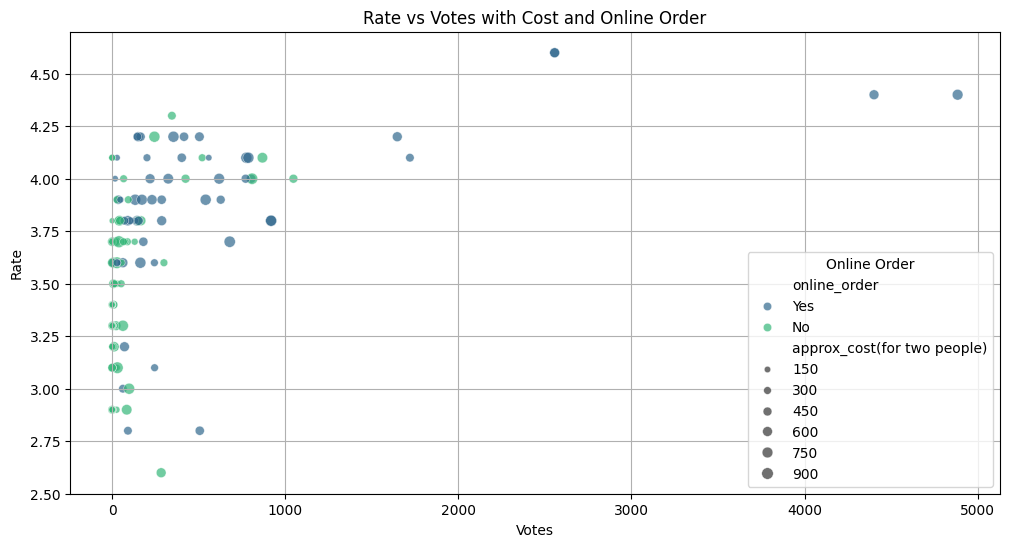

In [74]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='votes', y='rate', size='approx_cost(for two people)', hue='online_order', palette='viridis', alpha=0.7)
plt.xlabel('Votes')
plt.ylabel('Rate')
plt.title('Rate vs Votes with Cost and Online Order')
plt.legend(title='Online Order')
plt.grid(True)
plt.savefig('scatterplot2.png')
plt.show()

 This plot shows how votes and rates relate, with point size indicating cost and color indicating online ordering. There's no strong link between votes and cost. Online ordering seems more common among higher-rated restaurants with more votes, but restaurants of varying costs and online order availability exist across the board.



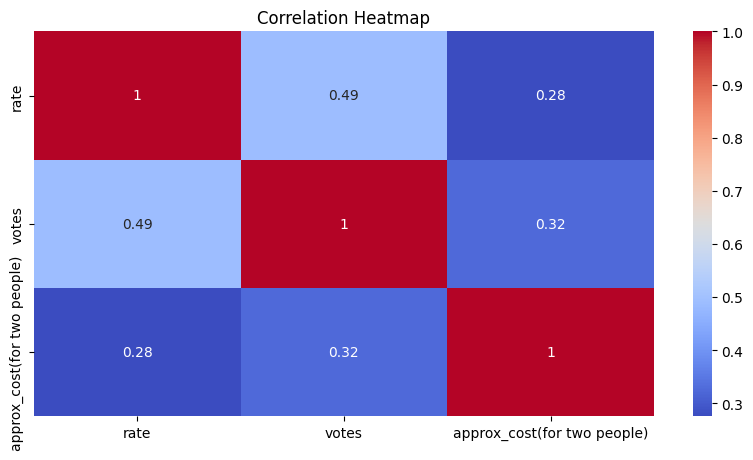

In [75]:
plt.figure(figsize=(10,5))
sns.heatmap(df[['rate', 'votes', 'approx_cost(for two people)']].corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.savefig('heatmap.png')
plt.show()

#From the heatmap, we can observe:

##1.Rate and Votes:
 The correlation coefficient is 0.49. This indicates a moderate positive linear correlation between 'rate' and 'votes'. As the number of votes increases, the rate tends to be higher, which aligns with our observations from the scatter and line plots.
##2.Rate and Approximate Cost:
The correlation coefficient is 0.28. This indicates a weak positive linear correlation between 'rate' and 'approx_cost(for two people)'. There's a slight tendency for restaurants with higher approximate costs to have higher rates, but the relationship is not strong.
##3.Votes and Approximate Cost:
 The correlation coefficient is 0.32. This indicates a weak positive linear correlation between 'votes' and 'approx_cost(for two people)'. There's a slight tendency for restaurants with more votes to have higher approximate costs, but again, the relationship is not strong, which we also saw in the scatterplot.
##4.In summary:-
 the strongest positive correlation is between 'rate' and 'votes', while the correlations involving 'approx_cost(for two people)' are weaker.



#Conclusion summarizing the key insights:-
 the dataset provides a snapshot of restaurants with a focus on their type, service options (online order, table booking), popularity (votes), customer satisfaction (rate), and price point. The analysis highlights the prevalence of 'Dining' establishments, the moderate adoption of online ordering, and a positive correlation between popularity and ratings. Restaurants offering online ordering show a tendency towards slightly higher ratings, suggesting a potential benefit of this service.

In [76]:
df.to_csv('cleaned_zomato_data.csv', index=False)